# K-vecinos más cercanos (KNN)
## Datos de clientes bancarios: crédito

In [8]:
#------------------------------------------------------------------------------
# IMPORTAMOS LAS LIBRERÍAS
#------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

#------------------------------------------------------------------------------
# CARGAMOS LOS DATOS
#------------------------------------------------------------------------------
clientes = pd.read_csv( "creditos.csv" )
clientes

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


# Pagadores VS Deudores

In [9]:
buenos = clientes[ clientes[ "cumplio" ] == 1 ]
malos = clientes[ clientes[ "cumplio" ] == 0 ]


# Gráfica: Pagadores VS Deudores

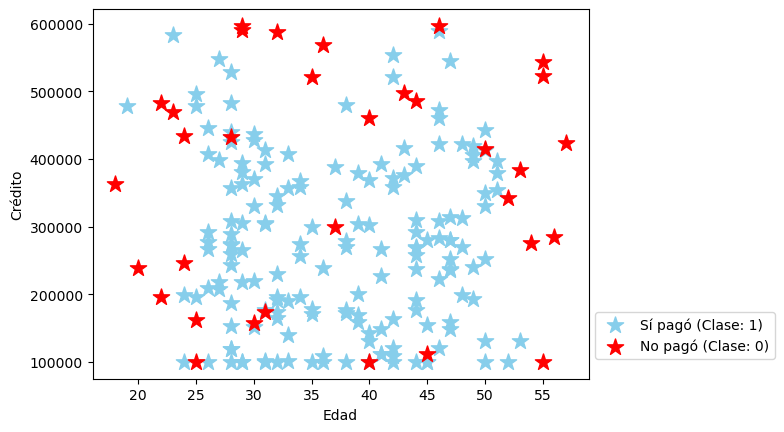

In [10]:
#------------------------------------------------------------------------------
# GENERAMOS LAS GRÁFICA ASOCIADA
#------------------------------------------------------------------------------
plt.scatter( buenos[ "edad" ], buenos[ "credito" ],
            marker = "*",
            s = 150,
            color = "skyblue",
            label = "Sí pagó (Clase: 1)")

plt.scatter( malos[ "edad" ], malos[ "credito" ],
            marker = "*",
            s = 150,
            color = "red",
            label = "No pagó (Clase: 0)")

plt.ylabel( "Crédito" )
plt.xlabel( "Edad" )
plt.legend( bbox_to_anchor = ( 1, 0.2 ) )
plt.show()

# Preparación de los datos (Escalar)

In [11]:
#------------------------------------------------------------------------------
# PREPARAMOS LOS DATOS ESCALÁNDOLOS
#------------------------------------------------------------------------------
datos = clientes[ [ "edad", "credito" ] ]
clase = clientes[ "cumplio" ]

escalador = preprocessing.MinMaxScaler()
datos = escalador.fit_transform( datos )

# Creación del Modelo KNN
## Valor de K

In [12]:
#------------------------------------------------------------------------------
#   CREAMOS EL MODELO KNN
#------------------------------------------------------------------------------
#   n_neighbors     número de vecinos                 (int).                             Por defecto es 5
#   weights         función de peso de la predicción  (uniform, distance).               Por defecto es uniform
#   algorithm       algoritmo de cálculo              (ball_tree, kd_tree, brute, auto). Por defecto es auto
#   leaf_size       tamaño de hoja de cálculo         (int).                             Por defecto es 30
#   p               párametro de potencia             (int).                             Por defecto es 2
#   metric          métrica sobre la distancia        ("minkowski", "precomputed").      Por defecto es "minkowski"
#   metric_params   argumentos adicionales            ("") .                             Por defecto es None
#   n_jobs          número de trabajos en paralelo    (int)                              Por defecto es None
#------------------------------------------------------------------------------
clasificador = KNeighborsClassifier(
    n_neighbors = 3,
    weights = "distance",
    algorithm = "brute",
    leaf_size = 100,
    p = 3,
    metric = "minkowski",
    n_jobs  = None
  )

clasificador.fit( datos, clase )

KNeighborsClassifier(algorithm='brute', leaf_size=100, n_neighbors=3, p=3,
                     weights='distance')

# Nuevo Solicitante (Clasificación)

c:\Users\dres\.conda\envs\Curso\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Petición de  [1]
Probabilidades por clase [[0.35401071 0.64598929]]


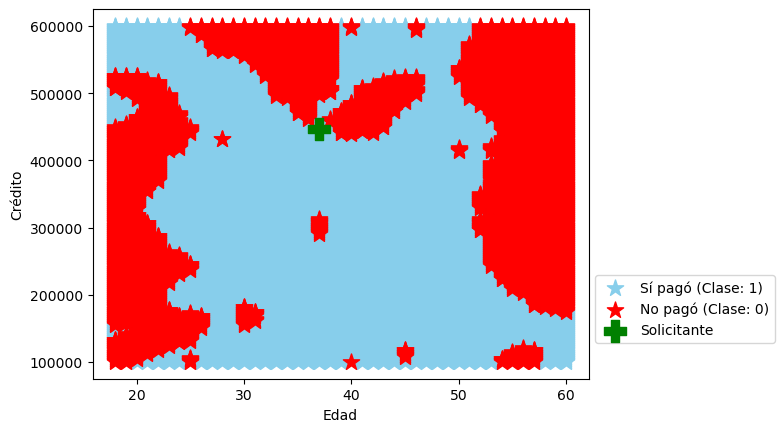

In [17]:
#------------------------------------------------------------------------------
# DEFINIMOS AHORA LOS DATOS DEL NUEVO SOLICITANTE (edad y cantidad)
#------------------------------------------------------------------------------
edad  = random.randint( 15, 60 )   # 53
cantidad = random.randint( 100, 600 ) * 1000 # 350000

#------------------------------------------------------------------------------
# ESCALAMOS LOS DATOS DEL NUEVO SOLICITANTE
#------------------------------------------------------------------------------
#Escalar los datos del nuevo solicitante
solicitante = escalador.transform( [ [ edad, cantidad ] ] )

#------------------------------------------------------------------------------
# CALCULAMOS CLASE Y PROBABILIDADES
#------------------------------------------------------------------------------
print( "Petición de ", clasificador.predict( solicitante ) )
print( "Probabilidades por clase",
      clasificador.predict_proba( solicitante ) )

#------------------------------------------------------------------------------
# GRÁFICO ASOCIADO
#------------------------------------------------------------------------------
plt.scatter( buenos[ "edad" ], buenos[ "credito" ],
             marker = "*",
             s = 150,
             color = "skyblue",
             label = "Sí pagó (Clase: 1)"
           )
plt.scatter( malos[ "edad" ], malos[ "credito" ],
             marker = "*",
             s = 150,
             color = "red",
             label = "No pagó (Clase: 0)"
           )
plt.scatter( edad, cantidad, marker = "P", s = 250, color = "green", label = "Solicitante" )
plt.ylabel( "Crédito" )
plt.xlabel( "Edad" )
plt.legend( bbox_to_anchor = ( 1, 0.3 ) )
plt.show()

# Regiones de las clases
### Pagadores vs Deudores

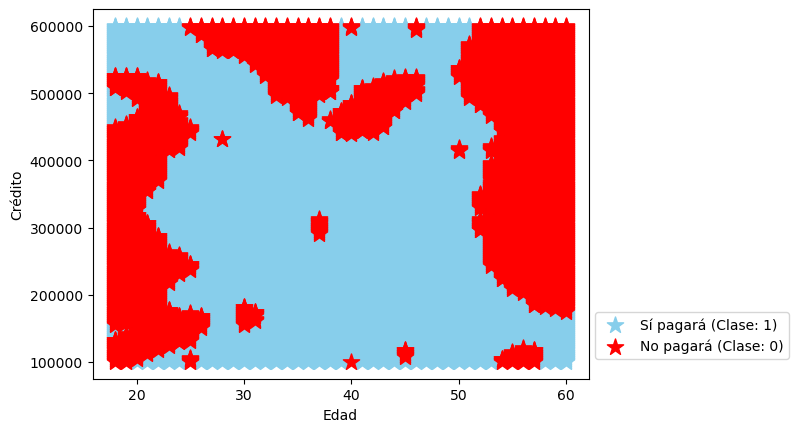

In [18]:
#------------------------------------------------------------------------------
# DATOS SINTÉTICOS DE TODOS LOS POSIBLES SOLICITANTES
#------------------------------------------------------------------------------
creditos = np.array( [ np.arange( 100000, 600010, 1000 ) ] *43 ).reshape(1, -1)
edades   = np.array( [ np.arange( 18, 61 ) ] * 501 ).reshape(1, -1)
todos = pd.DataFrame( np.stack( ( edades, creditos ), axis = 2 )[ 0 ],
                      columns = [ "edad", "credito" ] )

#------------------------------------------------------------------------------
# ESCALAMOS LOS DATOS
#------------------------------------------------------------------------------
solicitantes = escalador.transform( todos )

#------------------------------------------------------------------------------
# PREDECIMOS TODAS LAS CLASES
#------------------------------------------------------------------------------
clases_resultantes = clasificador.predict( solicitantes )

#------------------------------------------------------------------------------
# GENERAMOS EL GRÁFICO
#------------------------------------------------------------------------------
buenos = todos[ clases_resultantes == 1 ]
malos  = todos[ clases_resultantes == 0 ]
plt.scatter( buenos[ "edad" ], buenos[ "credito" ],
             marker = "*",
             s = 150,
             color = "skyblue",
             label = "Sí pagará (Clase: 1)"
            )
plt.scatter( malos[ "edad" ], malos[ "credito" ],
             marker = "*",
             s = 150,
             color = "red",
             label = "No pagará (Clase: 0)"
           )
plt.ylabel( "Crédito" )
plt.xlabel( "Edad" )
plt.legend( bbox_to_anchor = ( 1, 0.2 ) )
plt.show()